# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## Introduction/Background

For this project, I will be using the [Emotion](https://huggingface.co/datasets/emotion) dataset from Hugging Face. It is a collection of 20,000 English Tweets that are categorized by the emotion of the tweet. The emotions represented are: anger, fear, joy, love, sadness, and surprise. The dataset was created for a [2018 paper on emotion recognition](https://aclanthology.org/D18-1404/). 


## Exploratory Data Analysis

This dataset contains 20,000 entries split into 16,000 training, 2,000 validation, and 2,000 testing. 

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [5]:
# import all of the python modules/packages you'll need here
import pandas as pd
from datasets import load_dataset
import torch

dataset = load_dataset("emotion")
#print(dataset['train'].column_names)
#print(dataset['train'].features)
#dataset['train'][0:10]

#dataset.set_format(type='torch', columns=['text', 'label'])
#dataloader = torch.utils.data.DataLoader(dataset['train'], batch_size=32)
#print(type(dataloader))
#next(iter(dataloader))


# ...

Found cached dataset emotion (/home/caelan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

   Counts  Proportion    Labels
0    5797    0.291625   sadness
1    6761    0.335125       joy
2    1641    0.081500      love
3    2709    0.134937     anger
4    2373    0.121063      fear
5     719    0.035750  surprise
                                                text label
0                            i didnt feel humiliated     0
1  i can go from feeling so hopeless to so damned...     0
2   im grabbing a minute to post i feel greedy wrong     3
3  i am ever feeling nostalgic about the fireplac...     2
4                               i am feeling grouchy     3
5  ive been feeling a little burdened lately wasn...     0
6  ive been taking or milligrams or times recomme...     5
7  i feel as confused about life as a teenager or...     4
8  i have been with petronas for years i feel tha...     1
9                                i feel romantic too     2


<AxesSubplot:>

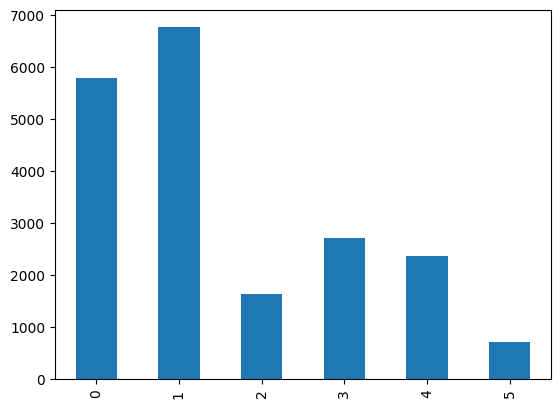

In [6]:
dataset.set_format(type='pandas', columns=['text','label'])
counts = dataset['train']['label'].value_counts() + dataset['validation']['label'].value_counts() + dataset['test']['label'].value_counts()
counts = counts.rename('Counts')
counts_norm = dataset['train']['label'].value_counts(normalize=True)
counts_norm = counts_norm.rename('Proportion')
# print(counts.sort_index(), counts.sum())
# print(counts_norm.sort_index(), counts_norm.sum())
labels = pd.Series(dataset['train'].features['label'].names)
labels = labels.rename('Labels')
totals = pd.concat([counts.sort_index(), counts_norm.sort_index(), labels], axis=1)
print(totals)
print(pd.DataFrame([dataset['train']['text'], dataset['train']['label']]).transpose().head(10))
counts.sort_index().plot.bar()

